# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Sofía Dalia Magallon Paramo

- ID: A01636714

- My carreer: ITC


# Importing libraries

In [157]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans


# PART 1
# Use your assigned dataset

## A1 Load data

In [158]:
url = "datasets/A01636714.csv"

df = pd.read_csv(url)

## A2 Data managment


Print the first 7 rows

In [159]:
df.head(7)

,Unnamed: 0,x1,x2
0,0,1.184413,0.088529
1,1,0.601073,-0.867451
2,2,1.248770,0.005457
3,3,0.472987,-1.015632
4,4,0.244521,0.887156
5,5,0.820606,-0.118446
6,6,-0.428732,-1.069066


Print the first 4 last rows

In [160]:
df.tail(4)

,Unnamed: 0,x1,x2
2044,2044,0.235908,-1.455594
2045,2045,1.446103,0.011129
2046,2046,0.503410,-0.928378
2047,2047,0.635816,-0.257549


How many rows and columns are in your data?

Use the `shape` method


In [161]:
f"There are {df.shape[0]} rows and {df.shape[1]} columns."

'There are 2048 rows and 3 columns.'

Print the name of all columns 

Use the `columns` method

In [162]:
df.columns

Index(['Unnamed: 0', 'x1', 'x2'], dtype='object')

What is the data type in each column

Use the `dtypes` method 

In [163]:
df.dtypes

Unnamed: 0      int64
x1            float64
x2            float64
dtype: object

What is the meaning of rows and columns?

    Rows are the observations and columns are the variables or features

Print a statistical summary of your columns


In [164]:
df.describe()

,Unnamed: 0,x1,x2
count,2048.000000,2048.000000,2048.000000
mean,1023.500000,0.249807,-0.497421
std,591.350996,0.532947,0.889308
min,0.000000,-0.948861,-2.492326
25%,511.750000,-0.175475,-1.132464
50%,1023.500000,0.248342,-0.477382
75%,1535.250000,0.694843,0.114128
max,2047.000000,1.461359,1.603369


- Max and min:
  - The minimum for x1 is -0.948861, while the maximum is 1.461359.  
  - The minimum for x2 is -2.492326, the maximum is 1.603369

- STD:
  - The mean for x1 is 0.249807 and std is 0.532947
  - The mean for x2 is -0.497421 and std is 0.889308
- %:
  - 25% represents the first quartile, which is the value below which 25% of the data lies.
  - 50% represents the second quartile, which is the value below which half of the data lies, so it can be interpreted as the median.
  - 75% represents the third quartile, which is the value below which 75% of the data lies.

Rename the columns using the same name with capital letters

In [165]:

df = df.rename(columns={
    df.columns[0]: df.columns[0].upper(), 
    df.columns[1]:df.columns[1].upper(), 
    df.columns[2]:df.columns[2].upper()
})

df.head()

,UNNAMED: 0,X1,X2
0,0,1.184413,0.088529
1,1,0.601073,-0.867451
2,2,1.248770,0.005457
3,3,0.472987,-1.015632
4,4,0.244521,0.887156


Rename the columns to their original names

In [166]:
df = df.rename(columns={
    df.columns[0]: df.columns[0].capitalize(), 
    df.columns[1]:df.columns[1].lower(), 
    df.columns[2]:df.columns[2].lower()
})

df.head()

,Unnamed: 0,x1,x2
0,0,1.184413,0.088529
1,1,0.601073,-0.867451
2,2,1.248770,0.005457
3,3,0.472987,-1.015632
4,4,0.244521,0.887156


Use two different alternatives to get one of the columns

In [167]:
df.x1

df['x1']

0       1.184413
1       0.601073
2       1.248770
3       0.472987
4       0.244521
          ...   
2043    0.858332
2044    0.235908
2045    1.446103
2046    0.503410
2047    0.635816
Name: x1, Length: 2048, dtype: float64

Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [168]:
df.loc[62:72,[df.columns[1],df.columns[2]]]

,x1,x2
62,0.915160,-0.111967
63,-0.646985,-0.554880
64,0.088490,-0.734912
65,-0.867982,-0.829258
66,0.700212,0.748795
67,-0.431501,-1.180917
68,0.536710,-0.883229
69,0.456022,-2.081472
70,0.863570,-0.576457
71,-0.511883,-0.860460


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [169]:
nulls = df.x1.count() - df.x1.dropna().count()

non_nulls = df.x1.notnull().count() 


if nulls + non_nulls == df.x1.count(): 
    print("The sum of nulls and non-nulls is equal to the number of observations.")
else:
    print("The sum of nulls and non-nulls is not equal to the number of observations.")


The sum of nulls and non-nulls is equal to the number of observations.


Discard the first column


In [170]:

df.drop(columns=[df.columns[0]], inplace=True)

df

,x1,x2
0,1.184413,0.088529
1,0.601073,-0.867451
2,1.248770,0.005457
3,0.472987,-1.015632
4,0.244521,0.887156
...,...,...
2043,0.858332,-0.312019
2044,0.235908,-1.455594
2045,1.446103,0.011129
2046,0.503410,-0.928378


### Questions 

Based on the previos results, provide a description of yout dataset

Your response:




## A3 Data visualization

Plot in the same figure the histogram of the two variables

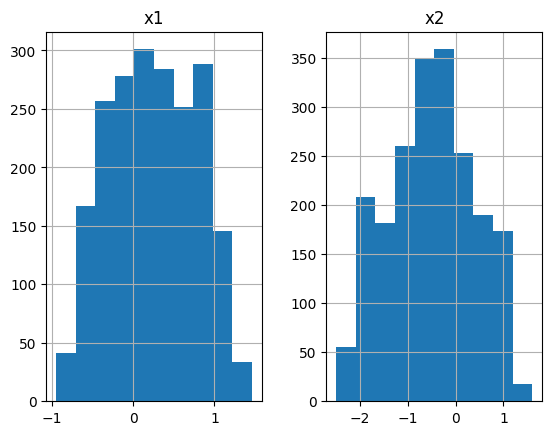

In [171]:
df.hist()
plt.show()


Based on this plots, provide a description of your data:

Your response here:

Plot in the same figure the boxplot of the two variables 

<Axes: >

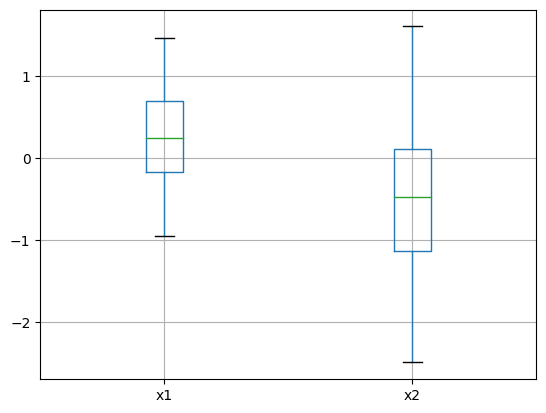

In [172]:
#Plot boxplot of x1 and x2 in the same figure
df.boxplot()

Scatter plot of the two variables

<Axes: xlabel='x1', ylabel='x2'>

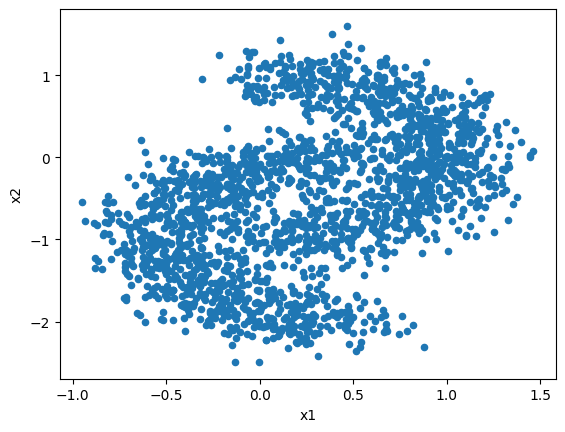

In [173]:
# Plot scatterplot of x1 and x2

df.plot.scatter(x=df.columns[0], y=df.columns[1])

### Questions 

Based on the previos plots, provide a description of yout dataset

Your response: There are two curves forming a spiral in with a hole in the middile of the plot. The data is not linearly separable. The data is distributed towards de center but avoiding the exact middle. It's displaced to the right and downwards.




## A4 Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plot

In [174]:
kmeans = KMeans(n_clusters=2, n_init="auto")

Add to your dataset a column with the assihned cluster to each data point

In [175]:
df["yestimated"] = kmeans.fit_predict(df)

Print the number associated to each cluster

In [176]:
df["yestimated"].unique()

array([0, 1])

Print the centroids

In [177]:
kmeans.cluster_centers_

array([[ 0.57608034,  0.21005229],
       [-0.08225251, -1.21744044]])

Print the intertia metric

In [178]:
kmeans.inertia_

935.1931924338745

Plot a scatter plot of your data assigned to each cluster. Also plot the centroids

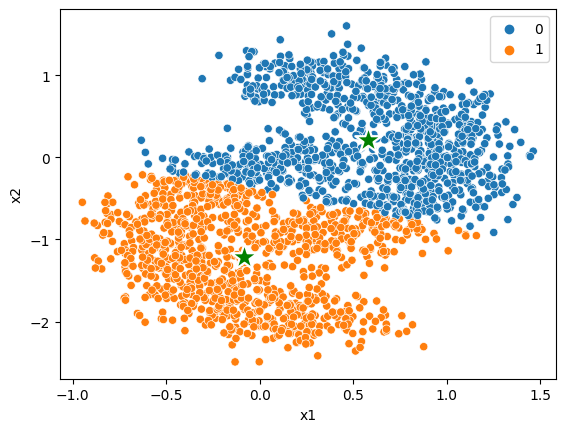

In [179]:
# Scatterplot of x1 and x2 with the estimated clusters and the centroids

sns.scatterplot(x=df.columns[0], y=df.columns[1], hue="yestimated", data=df)
sns.scatterplot(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], color="green", marker="*", s=400)
plt.show()

Trying another approach

<Axes: xlabel='x1', ylabel='x2'>

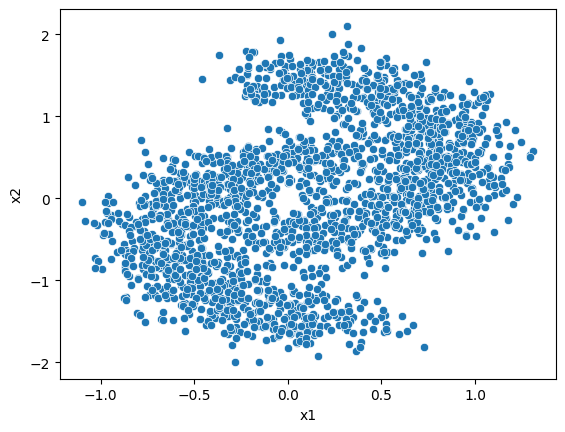

In [190]:
# Displace all the points to 0,0
dfa = df.copy()

dfa[dfa.columns[0]] = dfa[dfa.columns[0]] - dfa[dfa.columns[0]].mean()
dfa[dfa.columns[1]] = dfa[dfa.columns[1]] - dfa[dfa.columns[1]].mean()

# Adjust x1 to the right a bit
dfa[dfa.columns[0]] = dfa[dfa.columns[0]] + 0.1

# Scatterplot of x1 and x2 with the estimated clusters and the centroids

sns.scatterplot(x=df.columns[0], y=df.columns[1], data=dfa)

<Axes: xlabel='r', ylabel='theta'>

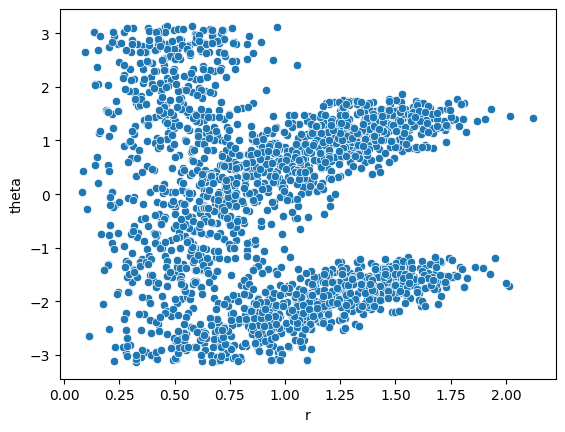

In [192]:
# Convert to polar coordinates

dfp = dfa.copy()

dfp["r"] = np.sqrt(dfp[dfp.columns[0]]**2 + dfp[dfp.columns[1]]**2)
dfp["theta"] = np.arctan2(dfp[dfp.columns[1]], dfp[dfp.columns[0]])

# Scatterplot of r and theta with the estimated clusters and the centroids

sns.scatterplot(x="r", y="theta", data=dfp)

<Axes: xlabel='r', ylabel='theta'>

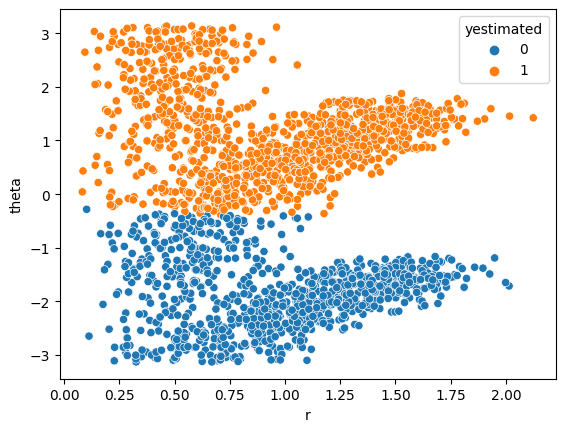

In [193]:
# KMenas with r and theta as features

kmeans = KMeans(n_clusters=2, n_init="auto")

dfp["yestimated"] = kmeans.fit_predict(dfp)

dfp["yestimated"].unique()

# Scatterplot of r and theta with the estimated clusters and the centroids

sns.scatterplot(x="r", y="theta", hue="yestimated", data=dfp)

<Axes: xlabel='x1', ylabel='x2'>

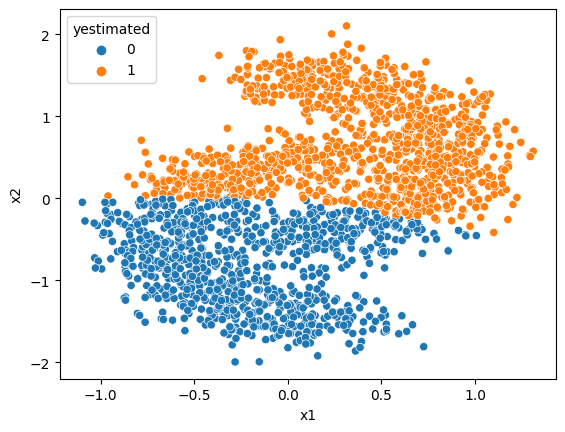

In [194]:
# Back to cartesian coordinates

sns.scatterplot(x=df.columns[0], y=df.columns[1], hue="yestimated", data=dfp)

And it was the same result haha :(

### Questions 

Provides a detailed description of your results

Your response: The kmeans algorithm doesn't seem to be enough to describe and cluster the data in this case. The data is not linearly separable and the clusters are not well defined, there seems to be an spiral similar to an hurricane.

## A5 Elbow plot

Compute the Elbow plot

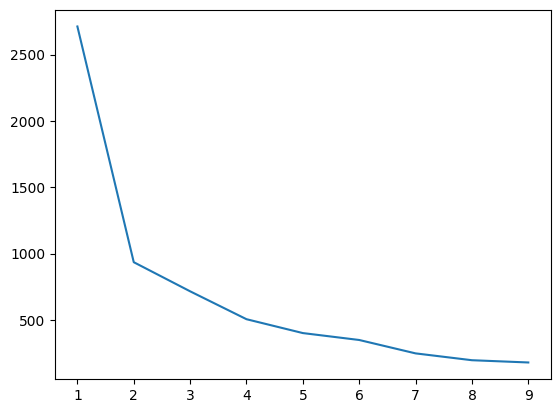

In [181]:
# Elbow method to find the optimal number of clusters

# Create an empty list to store the SSE values

sse = []

# Create a list of k values to test

k_values = range(1, 10)

# Loop through the k values and calculate the SSE for each k

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init="auto")
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

# Plot the SSE values for each k


plt.plot(k_values, sse)

### Questions 

What is the best number of clusters K?

Your response:  They can be either 2 or 4, since there's a significant jump between 1 and 2, but the next big jump is between 2 and 4.


Does this number of clusters agree with your inital guess? (argue your response)

Your response: Partially, because I can see there are either 2 or 4 clusters, however, the data is not suitable for the KMeans algorithm.



# PART 2
# Create a dataset and do clustering

1) Generate some data using the "make_blobs" function from "sklearn.datasets"

- The number of observations is equal to the three last digits in your ID (if this number is lower than 99, then multiply it by ten)

- 3 variables

- 4 clusters

- Standar deviation of each cluster of 1.5



In [214]:
# Makeblobs
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples=714, centers=4, n_features=3, random_state=0)

df = pd.DataFrame(x, columns=["x1", "x2", "x3"])

df["y"] = y

2) Plot the scatter plot of your data using the real cluster labels

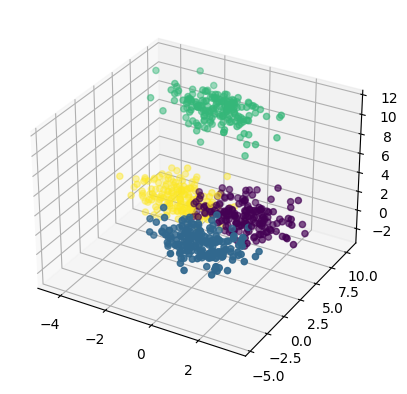

In [216]:
# 3D scatterplot

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.x1, df.x2, df.x3, c=df.y)
plt.show()

3) Do K means clustering 

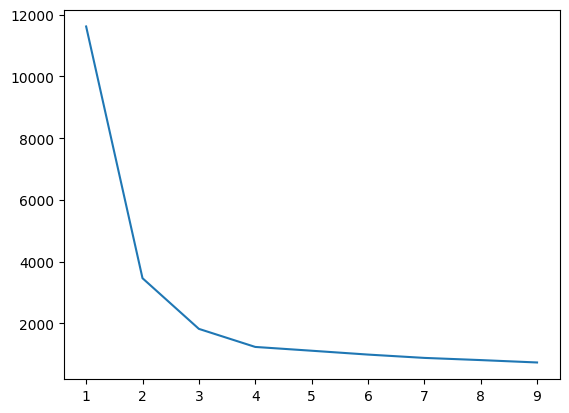

In [217]:
# Elbow method to find the optimal number of clusters
dfa = df.loc[:,["x1", "x2"]]

sse = []

k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init="auto")
    kmeans.fit(dfa)
    sse.append(kmeans.inertia_)

plt.plot(k_values, sse)

In [218]:
# Kmeans with 3 clusters

kmeans = KMeans(n_clusters=4, n_init="auto")
kmeans.fit(dfa)

dfa["yestimated"] = kmeans.fit_predict(dfa)

4) Plot the scatter plot of your data using the estimated cluster labels

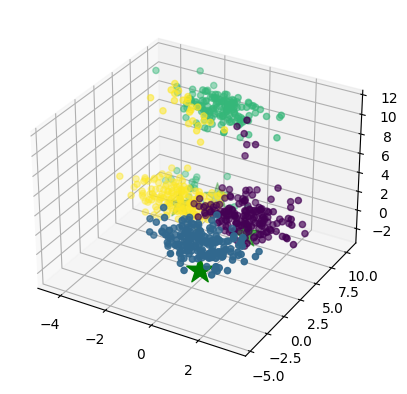

In [221]:
# 3D scatterplot with centroids

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.x1, df.x2, df.x3, c=dfa.yestimated)

plt.show()

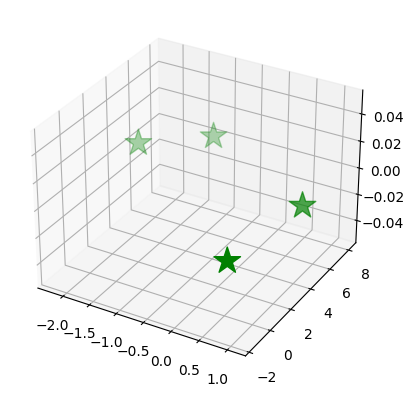

In [225]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="green", marker="*", s=400)
plt.show()

### Questions 

Provides a detailed description of your results.

Your response: I successfully generated a dataset with 3 variables and 4 clusters. After applying the KMeans algorithm to the data, I was able to partially recover the original clusters of the data. There's some noise, but overall it was a great result.

# PART 3
# Descipcion de tu percepcion del nivel de desarrollo de la subcompetencia 

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta: Logro interpretar interacciones entre variables, identificarlas y describirlas. Además, soy capaz de utilizar herramientas para el analisis detallado y visualización de datos, y de esta manera, interpretarlos y extraer información relevante de ellos, sus fenómenos e interacciones.

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta: Soy capaz de construir modelos bivariados y multivariados que expliquen el comportamiento de un fenómeno, utilizando herramientas de análisis de datos y visualización de datos. Además, soy capaz de interpretar los resultados de los modelos y utilizarlos para predecir el comportamiento de un fenómeno.